# Inverse Transform Method (Continuous)

In [1]:
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## More general function

In [2]:
# To obtain n samples based on inverse of target CDF
def GenInverseTransform(inv_cdf, n_samples, *args):
    # this function takes the inverse CDF function as an input
    # inv_cdf is a function
    # args are additional arguments to be given to inv_cdf

    # Initialize
    samples = []
    for i in range(n_samples):
        U = np.random.uniform(0,1) # generate 1 sample of U(0,1)
        sample_X = inv_cdf(U, *args)
        samples.append(sample_X)
    return samples

### Exponential distribution (last week's example)

In [3]:
# define inverse of exponential CDF
def inv_expo(u,mu):
    return -mu*math.log(1-u)

In [4]:
# generate 10000 samples
n_samples = 10000
mu = 30
samples = GenInverseTransform(inv_expo, n_samples,mu)

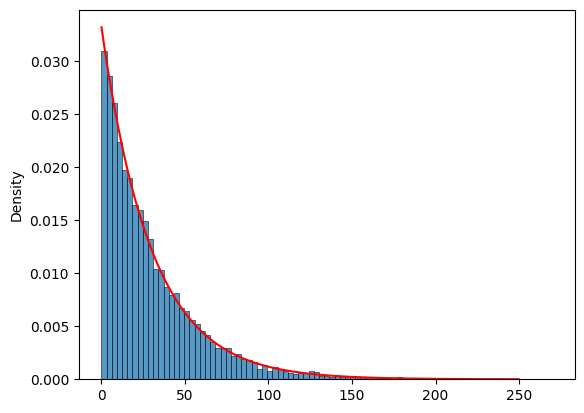

In [5]:
# plot histogram
sns.histplot(samples,stat='density')
# plot PDF
x = [i for i in np.arange(0.1,250,0.1)]
y = [math.exp(-t/mu)/mu for t in x]
plt.plot(x,y,color='red')
plt.show()

### Quadratic PDF

In [6]:
# define inverse of CDF
def inv_quad(u):
    return u**(1/3)

In [7]:
# generate 10000 samples
n_samples = 10000
samples = GenInverseTransform(inv_quad, n_samples)

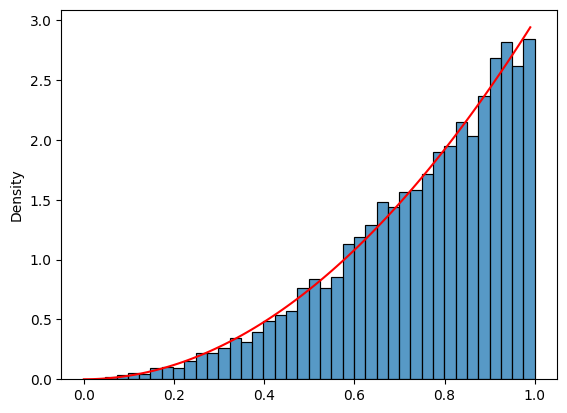

In [8]:
# plot histogram
sns.histplot(samples,stat='density')
# plot PDF
x = [i for i in np.arange(0,1,0.01)]
y = [3*t**2 for t in x]
plt.plot(x,y,color='red')
plt.show()

### Triangular distribution

In [ ]:
# define inverse of triangular CDF
def inv_triangular(u):
    """
    Inverse CDF of triangular distribution on [0,2] with peak at 1.
    """
    if u < 0 or u > 1:
        raise ValueError("Input must be in [0, 1]")
    if u <= 0.5:
        return np.sqrt(2 * u)
    else:
        return 2 - np.sqrt(2 * (1 - u))

In [10]:
# define triangular pdf for plotting
def pdf_triangular(u):
    if 0 <= u <= 1:
        return u
    elif 1 < u <= 2:
        return 2-u
    else:
        return 0

In [11]:
# generate 10000 samples
n_samples = 10000
samples = GenInverseTransform(inv_triangular, n_samples)

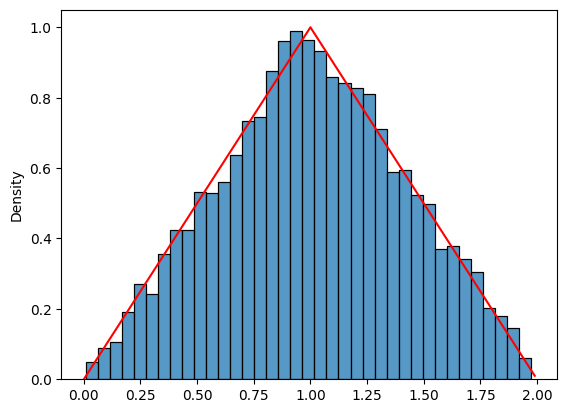

In [12]:
# plot histogram
sns.histplot(samples,stat='density')
# plot PDF
x = [i for i in np.arange(0,2,0.01)]
y = [pdf_triangular(t) for t in x]
plt.plot(x,y,color='red')
plt.show()

### Geometric distribution (while loop)

In [13]:
def cdf_geometric(k,p):
    return 1-(1-p)**k

In [14]:
def GenerateInvTransformDiscrete(cdf_func,n_samples,*args):
    # Initialize
    X = []
    for i in range(n_samples):
        U = np.random.uniform(0,1) # generate 1 sample of U(0,1)
        k = 1
        while U > cdf_func(k,*args):
            k = k + 1
        X.append(k)
    return X

In [15]:
# generate 10000 samples
n_samples = 10000
p = 0.5
samples = GenerateInvTransformDiscrete(cdf_geometric, n_samples,p)

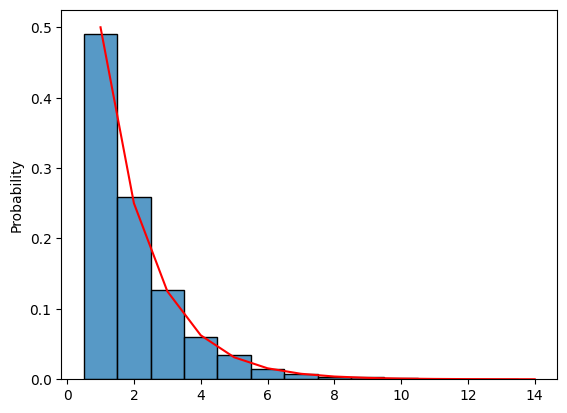

In [16]:
# plot histogram
sns.histplot(samples,stat='probability',discrete=True)
# plot PMF
x = [i for i in np.arange(1,15,1)]
y = [p*(1-p)**(t-1) for t in x]
plt.plot(x,y,color='red')
plt.show()

### Geometric distribution (unified)

In [17]:
# define generalized inverse of geometric CDF
def inv_geometric(u,p):
    return math.ceil(math.log(1-u)/math.log(1-p))

In [18]:
# generate 10000 samples
n_samples = 10000
p = 0.5
samples = GenInverseTransform(inv_geometric, n_samples,p)

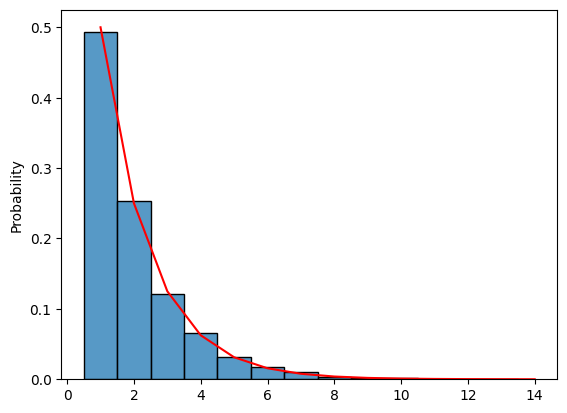

In [19]:
# plot histogram
sns.histplot(samples,stat='probability',discrete=True)
# plot PMF
x = [i for i in np.arange(1,15,1)]
y = [p*(1-p)**(t-1) for t in x]
plt.plot(x,y,color='red')
plt.show()

### Uniform distribution over disjoint intervals

In [20]:
# define generalized inverse of CDF
def inv_uniform_disjoint(u):
    if u < 0 or u > 1:
        raise ValueError("Input must be in [0, 1]")
    if u <= 0.5:
        return 2 * u
    else:
        return 2 * u + 1


In [25]:
# generate 10000 samples
n_samples = 10000
samples = GenInverseTransform(inv_uniform_disjoint, n_samples)

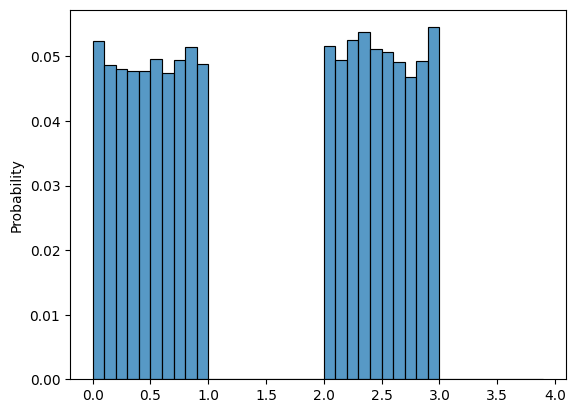

In [26]:
# plot histogram
sns.histplot(samples,stat='probability',bins=np.arange(0,4,0.1))
plt.show()